<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Census_IncomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing_Libs**

In [80]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score,recall_score,fbeta_score,precision_recall_curve,balanced_accuracy_score,roc_auc_score,confusion_matrix,plot_confusion_matrix

## **Importing_Data**

Data is available in 2 csv files.So both the files are imported and merged together.

In [5]:
names=['Age','WorkClass','Fnlwgt','Education','Education_Num','Marital_Status','Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss','Hours_Per_Week','Native_Country','Income']
df_1=pd.read_csv('/content/drive/MyDrive/datasets/Census_train.csv',names=names)

In [6]:
df_1.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_1.shape

(32561, 15)

### **Attribute Information:**

### *Listing of attributes:*

*  **Income** >50K, <=50K
*   **Age:** age of the person
*   **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*   **Fnlwgt:** No. of people the census believe the entry represents
*   **Education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*   **Education_num:** continuous.
*   **Marital_status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
*   **Occupation:**Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*   **Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*   **Race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*   **Sex:** Female, Male.
*   **Capital_gain:** continuous.
*   **Capital_loss:** continuous.
*   **Native_country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [8]:
names=['Age','WorkClass','Fnlwgt','Education','Education_Num','Marital_Status','Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss','Hours_Per_Week','Native_Country','Income']
df_2=pd.read_csv('/content/drive/MyDrive/datasets/Census_test.csv',names=names)

In [306]:
df_2['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [307]:
df_2.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [308]:
df_2.shape

(16281, 15)

In [9]:
#merging both the datafiles
df=pd.concat([df_1,df_2], ignore_index=True, sort=False)
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
df.shape

(48842, 15)

In [11]:
#checking whether there is any duplicated values in the database
duplicates=df.duplicated()

In [12]:
#we can see there are duplicated values
np.unique(duplicates)

array([False,  True])

In [13]:
#we are dropping the duplicated values
df.drop_duplicates(ignore_index=True,inplace=True)

In [14]:
#printing the rows and columns after del the duplicated values(52 rows).
#We have 48790 rows 
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 48790 Columns: 15


In [315]:
#checking the dtypes and no. of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48790 non-null  int64 
 1   WorkClass       48790 non-null  object
 2   Fnlwgt          48790 non-null  int64 
 3   Education       48790 non-null  object
 4   Education_Num   48790 non-null  int64 
 5   Marital_Status  48790 non-null  object
 6   Occupation      48790 non-null  object
 7   Relationship    48790 non-null  object
 8   Race            48790 non-null  object
 9   Sex             48790 non-null  object
 10  Capital_Gain    48790 non-null  int64 
 11  Capital_Loss    48790 non-null  int64 
 12  Hours_Per_Week  48790 non-null  int64 
 13  Native_Country  48790 non-null  object
 14  Income          48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [316]:
#Checking the satistical elements of of continous varibles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
Fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
Education_Num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
Capital_Gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
Capital_Loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
Hours_Per_Week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


In [317]:
df.isnull().any()

Age               False
WorkClass         False
Fnlwgt            False
Education         False
Education_Num     False
Marital_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain      False
Capital_Loss      False
Hours_Per_Week    False
Native_Country    False
Income            False
dtype: bool

In [15]:
#we are creating a copy of the dataframe so that we can further edit the dataframe while keeping the original one intact
df_new=df.copy()

In [16]:
df_new.shape

(48790, 15)

In [17]:
df_new.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

In [321]:
#Checking the target value
df['Income'].value_counts()

 <=50K    37109
 >50K     11681
Name: Income, dtype: int64

**We can see we have an imbalanced dataset with 75:25 ratio of distribution**

In [322]:
income=df['Income'].value_counts(normalize=True)
round(income*100,2).astype('str')+'%'

 <=50K    76.06%
 >50K     23.94%
Name: Income, dtype: object

## **Data_Visualization and Data_Cleaning**

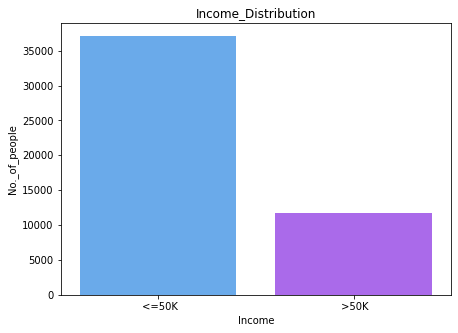

In [323]:
#checking the target column
income = df['Income'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='cool')
plt.title('Income_Distribution')
plt.xlabel('Income')
plt.ylabel('No._of_people')
plt.show()

In [324]:
#doing the value_counts of Age column
Counter(df['Age'])

Counter({17: 594,
         18: 861,
         19: 1045,
         20: 1111,
         21: 1092,
         22: 1176,
         23: 1325,
         24: 1205,
         25: 1190,
         26: 1153,
         27: 1231,
         28: 1279,
         29: 1221,
         30: 1275,
         31: 1324,
         32: 1253,
         33: 1335,
         34: 1303,
         35: 1336,
         36: 1348,
         37: 1279,
         38: 1263,
         39: 1204,
         40: 1187,
         41: 1234,
         42: 1164,
         43: 1103,
         44: 1066,
         45: 1095,
         46: 1095,
         47: 1080,
         48: 845,
         49: 845,
         50: 866,
         51: 877,
         52: 738,
         53: 711,
         54: 613,
         55: 621,
         56: 564,
         57: 551,
         58: 555,
         59: 523,
         60: 449,
         61: 450,
         62: 394,
         63: 335,
         64: 340,
         65: 284,
         66: 237,
         67: 238,
         68: 178,
         69: 149,
         70: 133,

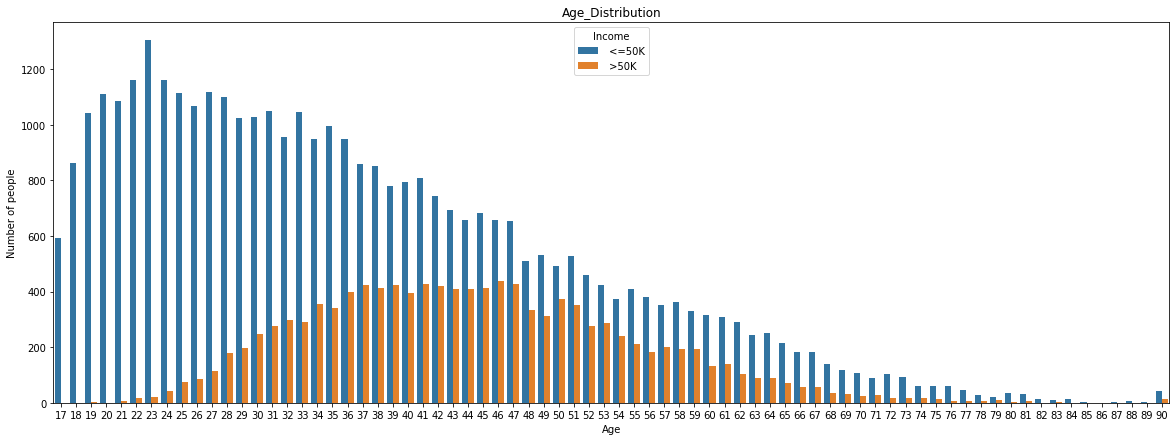

In [325]:
#analyzing age and distribution of income in it
plt.figure(figsize=(20,7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Age_Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

In [326]:
# Various working Class avilable
Counter(df['WorkClass'])

Counter({' ?': 2795,
         ' Federal-gov': 1432,
         ' Local-gov': 3136,
         ' Never-worked': 10,
         ' Private': 33860,
         ' Self-emp-inc': 1694,
         ' Self-emp-not-inc': 3861,
         ' State-gov': 1981,
         ' Without-pay': 21})

In [327]:
# we could see a special character'?' in the column lets see whethe its present in other columns too
df.isin([' ?']).sum()
#we can see its present in 3 columns namely Workclass,Occupation,Native_Country

Age                  0
WorkClass         2795
Fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        2805
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     856
Income               0
dtype: int64

In [328]:
df.isnull().any()

Age               False
WorkClass         False
Fnlwgt            False
Education         False
Education_Num     False
Marital_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain      False
Capital_Loss      False
Hours_Per_Week    False
Native_Country    False
Income            False
dtype: bool

In [18]:
#we are replacing the special character with Nan value so that we can impute some value satistically
features=['WorkClass','Occupation','Native_Country']
df_new[features]=df[features].replace(' ?',np.nan)

In [19]:
df_new.isnull().sum()

Age                  0
WorkClass         2795
Fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        2805
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     856
Income               0
dtype: int64

In [20]:
null_cols = ['WorkClass','Occupation','Native_Country']

In [21]:
# We are replacing and filling the Nan values with mode of the columns as its a object column
for col in null_cols:
    df_new[col].fillna(df_new[col].mode()[0], inplace=True)

In [22]:
df_new.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64

In [23]:
Counter(df['WorkClass'])

Counter({' ?': 2795,
         ' Federal-gov': 1432,
         ' Local-gov': 3136,
         ' Never-worked': 10,
         ' Private': 33860,
         ' Self-emp-inc': 1694,
         ' Self-emp-not-inc': 3861,
         ' State-gov': 1981,
         ' Without-pay': 21})

In [24]:
#checking whether the new values have been imputed in the new dataframe
Counter(df_new['WorkClass'])

Counter({' Federal-gov': 1432,
         ' Local-gov': 3136,
         ' Never-worked': 10,
         ' Private': 36655,
         ' Self-emp-inc': 1694,
         ' Self-emp-not-inc': 3861,
         ' State-gov': 1981,
         ' Without-pay': 21})

In [336]:
#anaalysing values so that we can categorize it
df.loc[df['WorkClass']==' Without-pay'].head(7)

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
1901,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
9254,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
15527,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
15689,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
16806,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20064,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
21932,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K


In [337]:
#anaalysing values so that we can categorize it
df_new['WorkClass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [25]:
#we are categorizing the whole values into 3 groups namely: gov,pvt,non_working
replace_dict=dict([(' State-gov','government'),(' Self-emp-not-inc','private'),(' Private','private'),(' Federal-gov','government'),
                   (' Local-gov','government'),(' Self-emp-inc','private'),(' Without-pay','not_working'),(' Never-worked','not_working')])

In [26]:
for k,v in replace_dict.items():
  df_new['WorkClass'].replace(k,v,inplace=True)

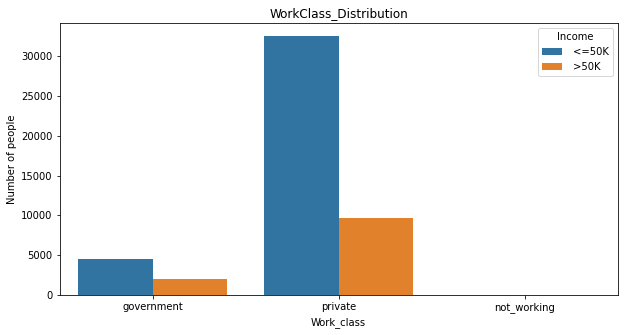

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df_new['WorkClass'], hue=df['Income'])
plt.title('WorkClass_Distribution')
plt.xlabel('Work_class')
plt.ylabel('Number of people')
plt.show()

In [341]:
#analyzing unique values of Education
df.Education.value_counts()

 HS-grad         15770
 Some-college    10863
 Bachelors        8013
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              655
 Doctorate         594
 5th-6th           507
 1st-4th           245
 Preschool          81
Name: Education, dtype: int64

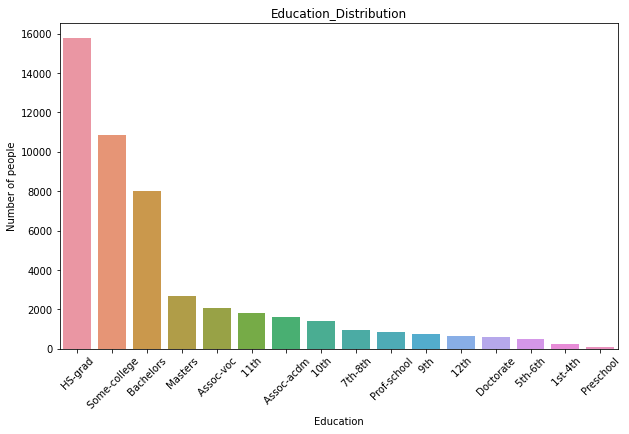

In [342]:
education = df['Education'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(education.index,education.values)
plt.title('Education_Distribution')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.xticks(rotation=45)
plt.show()

In [343]:
df.loc[df['Education']==' Assoc-voc'].head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
49,29,Private,271466,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,United-States,<=50K
57,35,Private,56352,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Puerto-Rico,<=50K
90,57,Private,249977,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [344]:
df.loc[df['Education']==' Assoc-acdm'].head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
39,48,Self-emp-not-inc,265477,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
76,40,Private,32214,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [345]:
df.loc[df['Education']==' Prof-school'].head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
111,38,Private,65324,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,55,United-States,>50K
250,41,Private,112763,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
286,41,Private,220531,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [346]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
## Categorizing education table into 3: college,post_college,school
replace_dict=dict([(' Bachelors','college'),(' HS-grad','college'),(' Masters','post_college'),(' 11th','school'),(' 9th','school'),(' Some-college','college'),
                   (' Assoc-acdm','college'),(' Assoc-voc','college'),(' 7th-8th','school'),(' Doctorate','post_college'),(' Prof-school','post_college'),
                   (' 5th-6th','school'),(' 10th','school'),(' 1st-4th','school'),(' Preschool','school'),(' 12th','school')])

In [29]:
for k,v in replace_dict.items():
  df_new['Education'].replace(k,v,inplace=True)

In [30]:
df_new['Education'].unique()

array(['college', 'school', 'post_college'], dtype=object)

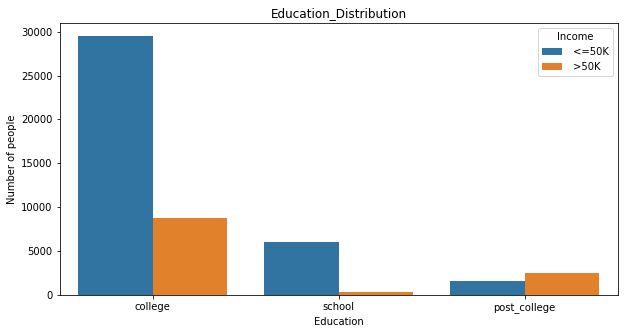

In [350]:
plt.figure(figsize=(10,5)),
sns.countplot(df_new['Education'], hue=df_new['Income'])
plt.title('Education_Distribution')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

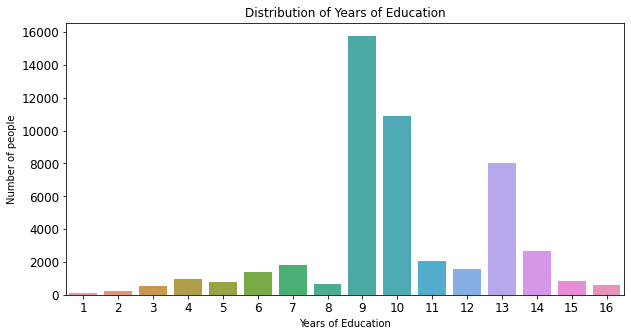

In [351]:
#analysing educational years 
education_num = df['Education_Num'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(education_num.index, education_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

In [352]:
#we can see the multicollinearity and redundancy among the table of education and education years
educational_years=df_new.groupby(['Education_Num','Education','Income']).size()
educational_years

Education_Num  Education     Income
1              school         <=50K       80
                              >50K         1
2              school         <=50K      237
                              >50K         8
3              school         <=50K      480
                              >50K        27
4              school         <=50K      892
                              >50K        62
5              school         <=50K      715
                              >50K        41
6              school         <=50K     1302
                              >50K        87
7              school         <=50K     1720
                              >50K        92
8              school         <=50K      607
                              >50K        48
9              college        <=50K    13269
                              >50K      2501
10             college        <=50K     8802
                              >50K      2061
11             college        <=50K     1538
                   

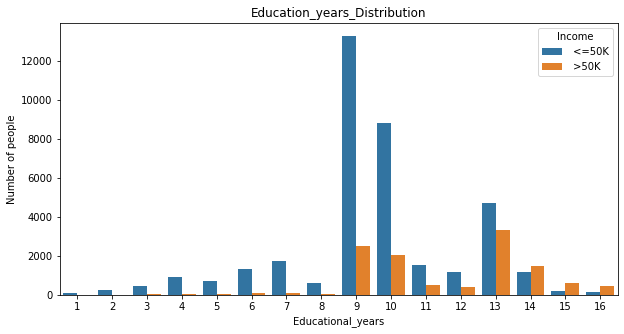

In [353]:
plt.figure(figsize=(10,5)),
sns.countplot(df_new['Education_Num'], hue=df_new['Income'])
plt.title('Education_years_Distribution')
plt.xlabel('Educational_years')
plt.ylabel('Number of people')
plt.show()

In [31]:
#we are del the education_num col cause of the redundancy
del df_new['Education_Num']

In [32]:
df_new.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income'],
      dtype='object')

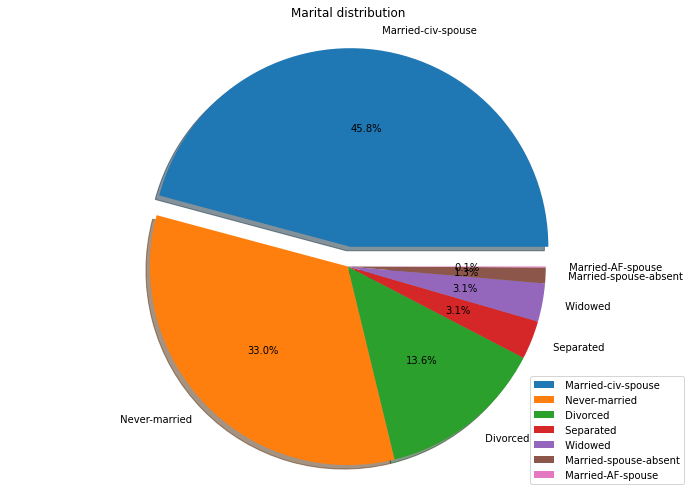

In [356]:
#Analyzinf the marital status of people
marital_status = df['Marital_Status'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(marital_status.values, labels=marital_status.index, startangle=0, explode=(
    0.10, 0, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [357]:
df_new['Marital_Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [33]:
#we are categoizing the columns into 3: bachelor,married,living alone
replace_dict=dict([(' Never-married','bachelor'),(' Married-civ-spouse','married'),(' Divorced','living_alone'),(' Married-spouse-absent','living_alone'),
                   (' Separated','living_alone'),(' Married-AF-spouse','married'),(' Widowed','living_alone')])

In [34]:
for k,v in replace_dict.items():
  df_new['Marital_Status'].replace(k,v,inplace=True)

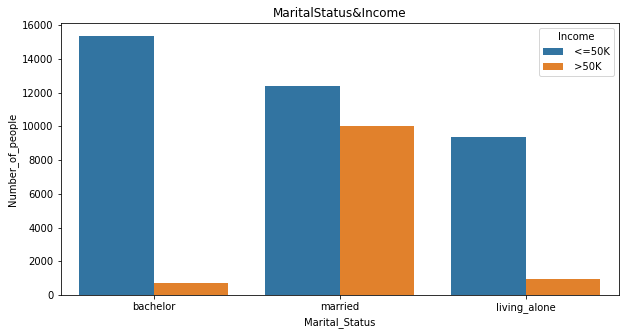

In [35]:
plt.figure(figsize=(10,5)),
sns.countplot(df_new['Marital_Status'], hue=df_new['Income'])
plt.title('MaritalStatus&Income')
plt.xlabel('Marital_Status')
plt.ylabel('Number_of_people')
plt.show()

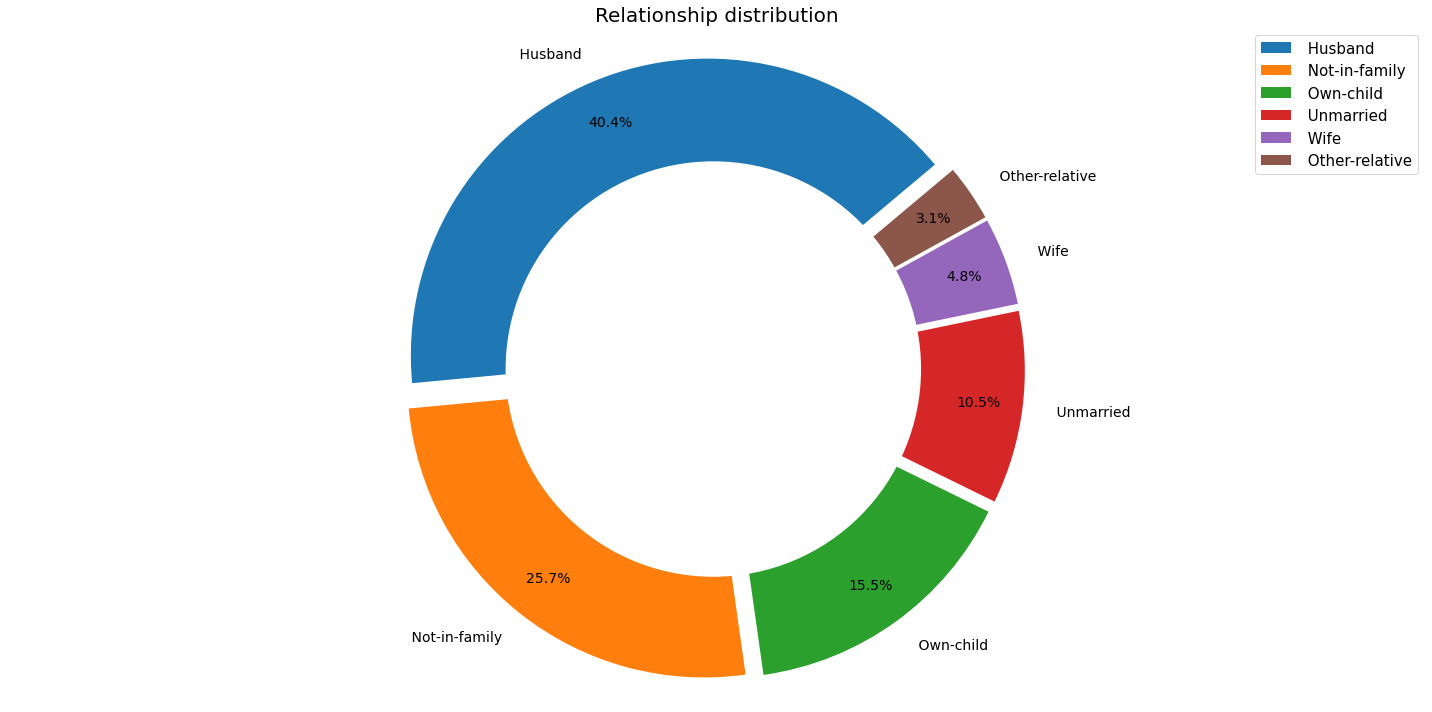

In [361]:
#checking the relationship of the people
relation = df['Relationship'].value_counts()

plt.figure(figsize=(20, 10))
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(relation.values, labels=relation.index,
        startangle=40, pctdistance=0.85, autopct='%1.1f%%',explode = explode,textprops={'fontsize':14})
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution',fontsize=20)
plt.axis('equal')
plt.legend(prop={'size':15})
plt.tight_layout()
plt.show()

In [362]:
df_new['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [36]:
#categorizing the column into 3:alone,husband_wife,other
replace_dict=dict([(' Not-in-family','alone'),(' Husband','husband_wife'),(' Wife','husband_wife'),(' Own-child','alone'),
                   (' Unmarried','alone'),(' Other-relative','other')])

In [37]:
for k,v in replace_dict.items():
  df_new['Relationship'].replace(k,v,inplace=True)

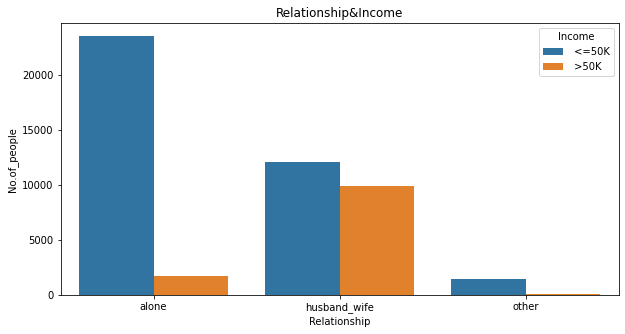

In [38]:
plt.figure(figsize=(10,5)),
sns.countplot(df_new['Relationship'], hue=df_new['Income'])
plt.title('Relationship&Income')
plt.xlabel('Relationship')
plt.ylabel('No.of_people')
plt.show()

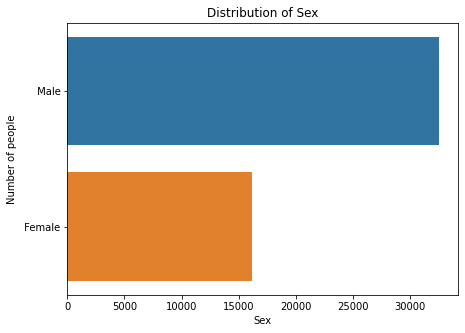

In [366]:
#analyzing the gender of people
sex = df['Sex'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(sex.values, sex.index)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

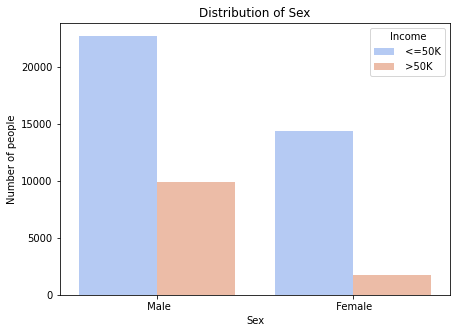

In [367]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Sex'], hue=df['Income'], palette='coolwarm')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

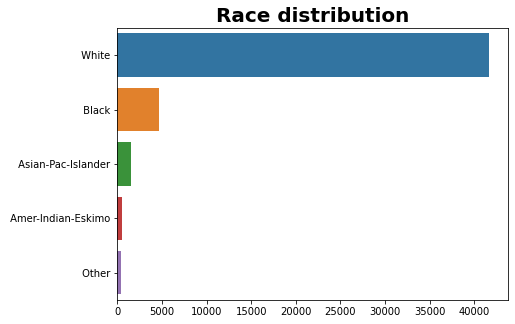

In [368]:
#analyzing the race of the people
race = df['Race'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(race.values, race.index,)
plt.title('Race distribution', fontdict={
         'fontsize': 20, 'fontweight': 'bold'})
plt.show()

In [369]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [39]:
#we are categoizning into 4: White,Black,Aborgingals,other
replace_dict=dict([(' Asian-Pac-Islander','aborginals'),(' Amer-Indian-Eskimo','aborginals')])

In [40]:
for k,v in replace_dict.items():
  df_new['Race'].replace(k,v,inplace=True)

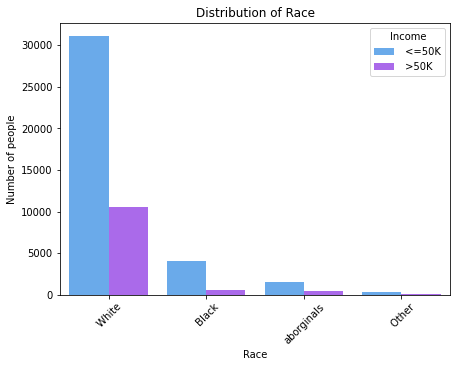

In [41]:
plt.figure(figsize=(7, 5))
sns.countplot(df_new['Race'], hue=df_new['Income'], palette='cool')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.ylabel('Number of people')
plt.show()

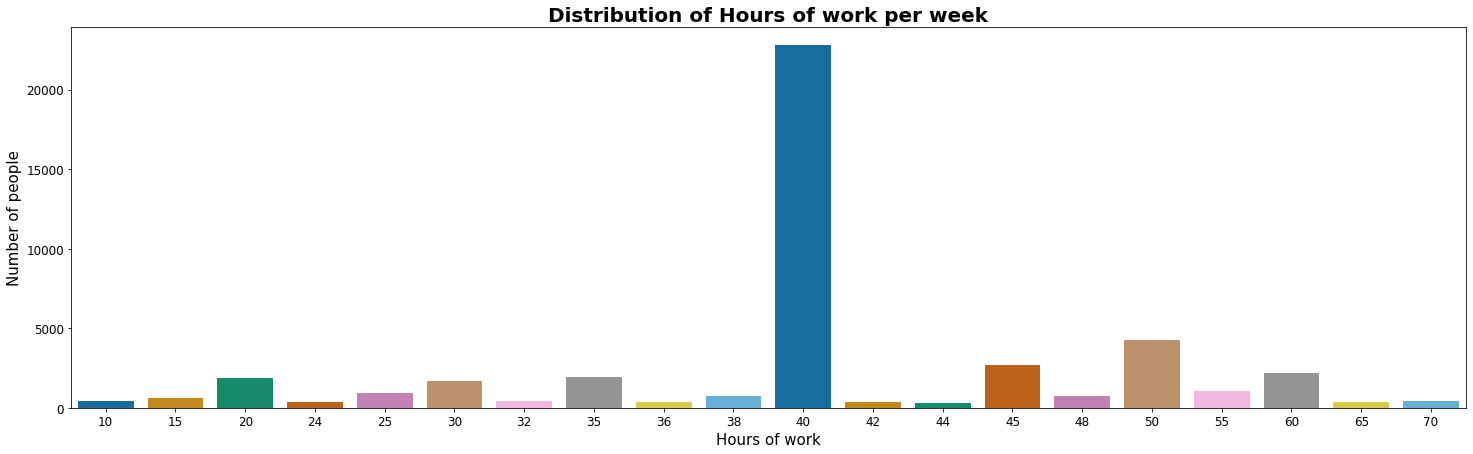

In [42]:
#checking the distribution of hours
hours = df['Hours_Per_Week'].value_counts().head(20)

plt.figure(figsize=(25, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work',fontdict={
           'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [374]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

In [375]:
#Checking the native country
Counter(df_new['Native_Country'])

Counter({' Cambodia': 28,
         ' Canada': 182,
         ' China': 122,
         ' Columbia': 85,
         ' Cuba': 138,
         ' Dominican-Republic': 103,
         ' Ecuador': 45,
         ' El-Salvador': 155,
         ' England': 127,
         ' France': 38,
         ' Germany': 206,
         ' Greece': 49,
         ' Guatemala': 86,
         ' Haiti': 75,
         ' Holand-Netherlands': 1,
         ' Honduras': 20,
         ' Hong': 30,
         ' Hungary': 19,
         ' India': 151,
         ' Iran': 59,
         ' Ireland': 37,
         ' Italy': 105,
         ' Jamaica': 106,
         ' Japan': 92,
         ' Laos': 23,
         ' Mexico': 943,
         ' Nicaragua': 49,
         ' Outlying-US(Guam-USVI-etc)': 23,
         ' Peru': 46,
         ' Philippines': 294,
         ' Poland': 87,
         ' Portugal': 67,
         ' Puerto-Rico': 184,
         ' Scotland': 21,
         ' South': 115,
         ' Taiwan': 65,
         ' Thailand': 30,
         ' Trinadad&Tobago': 27,

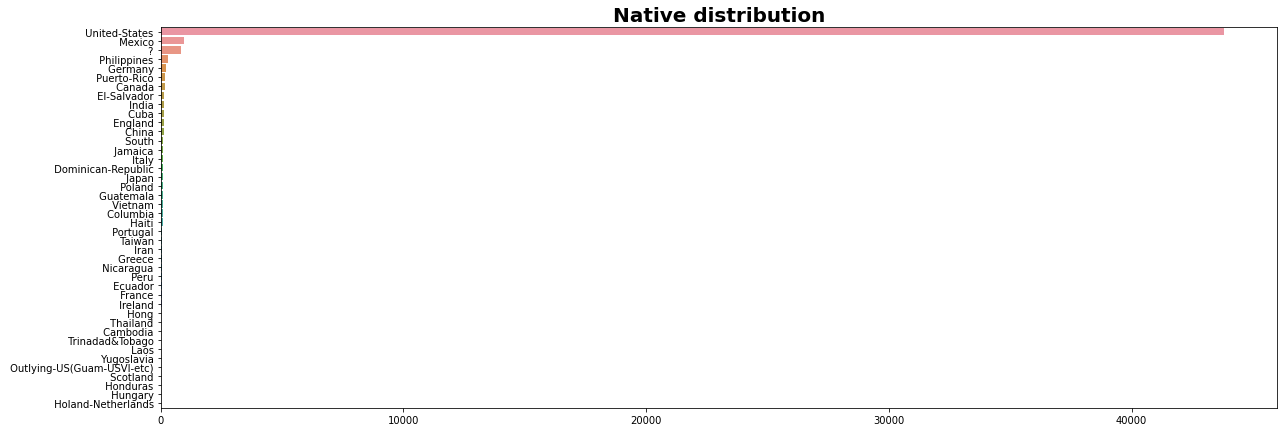

In [376]:
#No.of distirbution according to the country
native = df['Native_Country'].value_counts()

plt.figure(figsize=(20,7))
sns.barplot(native.values, native.index,)
plt.title('Native distribution', fontdict={
         'fontsize': 20, 'fontweight': 'bold'})
plt.show()

In [43]:
replace_dict=dict([(' Cambodia','Asia'),(' Canada','North_America'),(' China','Asia'),(' Columbia','South_America'),(' Cuba','North_America'),
                   (' Dominican-Republic','North_America'),(' Ecuador','South_America'),(' El-Salvador','North_America'),(' England','Europe'),
                   (' France','Europe'),(' Germany','Europe'),(' Greece','Europe'),(' Guatemala','North_America'),(' Haiti','North_America'),
                   (' Holand-Netherlands','Europe'),(' Honduras','North_America'),(' Hong','Asia'),(' Hungary','Europe'),(' India','Asia'),
                   (' Iran','Asia'),(' Ireland','Europe'),(' Italy','Europe'),(' Jamaica','North_America'),(' Japan','Asia'),(' Laos','Asia'),
                   (' Mexico','South_America'),(' Nicaragua','North_America'),(' Outlying-US(Guam-USVI-etc)','North_America'),
                   (' Peru','South_America'),(' Philippines','Asia'),(' Poland','Europe'),(' Portugal','Europe'),(' Puerto-Rico','North_America'),
                   (' Scotland','Europe'),(' South','South_America'),(' Taiwan','Asia'),(' Thailand','Asia'),(' Trinadad&Tobago','South_America'),
                   (' Vietnam','Asia'),(' Yugoslavia','Europe')])

In [44]:
# we are categorizing the native country according to continents while keeping US as a different entity because it has major data points in it
for k,v in replace_dict.items():
  df_new['Native_Country'].replace(k,v,inplace=True)

In [45]:
df_new['Native_Country'].unique()

array([' United-States', 'North_America', 'Asia', 'South_America',
       'Europe'], dtype=object)

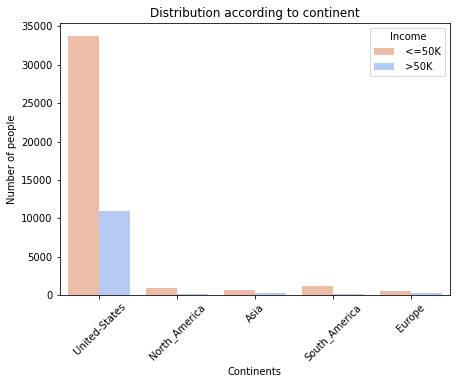

In [46]:
plt.figure(figsize=(7, 5))
sns.countplot(df_new['Native_Country'], hue=df_new['Income'], palette='coolwarm_r')
plt.title('Distribution according to continent')
plt.xlabel('Continents')
plt.xticks(rotation=45)
plt.ylabel('Number of people')
plt.show()

In [381]:
#Analyzing the Occupations of people
df_new['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

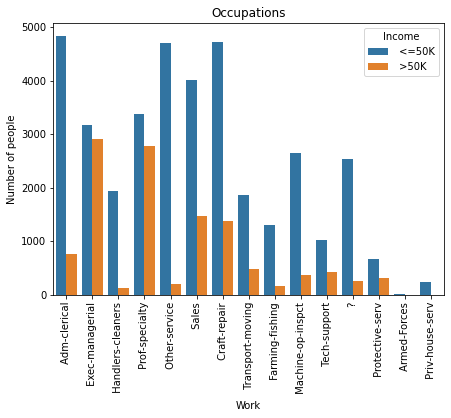

In [382]:
plt.figure(figsize=(7, 5))
sns.countplot(df['Occupation'], hue=df['Income'])
plt.title('Occupations')
plt.xlabel('Work')
plt.xticks(rotation=90)
plt.ylabel('Number of people')
plt.show()

In [47]:
replace_dict=dict([(' Adm-clerical','low_level'),(' Exec-managerial','high_level'),(' Handlers-cleaners','low_level'),(' Prof-specialty','high_level'),
                   (' Other-service','low_level'),(' Sales','mid_level'),(' Craft-repair','low_level'),
                   (' Transport-moving','low_level'),(' Farming-fishing','low_level'),(' Machine-op-inspct','low_level'),
                   (' Tech-support','mid_level'),(' Protective-serv','mid_level'),(' Armed-Forces','low_level'),(' Priv-house-serv','low_level')])

In [48]:
#We are categorizing the columns into 3: HighLevel,MidLevel,Lowlevel work
for k,v in replace_dict.items():
  df_new['Occupation'].replace(k,v,inplace=True)

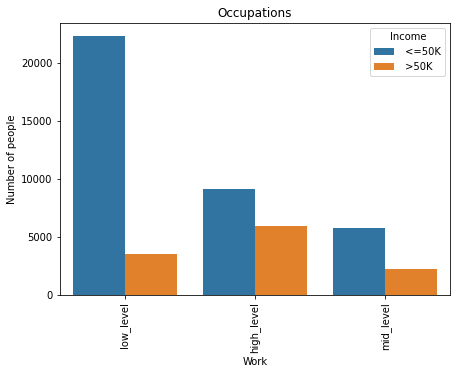

In [49]:
plt.figure(figsize=(7, 5))
sns.countplot(df_new['Occupation'], hue=df_new['Income'])
plt.title('Occupations')
plt.xlabel('Work')
plt.xticks(rotation=90)
plt.ylabel('Number of people')
plt.show()

In [50]:
len(Counter(df['Capital_Gain']))

123

In [387]:
len(Counter(df['Capital_Loss']))

99

In [388]:
df_new.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income'],
      dtype='object')

## **Data_Processing**

In [51]:
# Converting the category columns into categories
for col in ['WorkClass','Education', 'Marital_Status','Occupation', 'Relationship', 'Race', 'Sex','Native_Country']:
  df_new[col]=df_new[col].astype('category')

In [52]:
df_new.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Marital_Status    category
Occupation        category
Relationship      category
Race              category
Sex               category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income              object
dtype: object

In [53]:
col=df_new.columns
df_new[col].dtypes=='category'

Age               False
WorkClass          True
Fnlwgt            False
Education          True
Marital_Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_Gain      False
Capital_Loss      False
Hours_Per_Week    False
Native_Country     True
Income            False
dtype: bool

In [54]:
#doing one hot encoding to categorical table
dummy=pd.DataFrame()
for col in df_new.columns:
  if df_new[col].dtypes=='category':
    temp= pd.get_dummies(df_new[col],drop_first=True, prefix= col)
    dummy=pd.concat([dummy,temp],axis=1)

In [55]:
dummy.head()

,WorkClass_not_working,WorkClass_private,Education_post_college,Education_school,Marital_Status_living_alone,Marital_Status_married,Occupation_low_level,Occupation_mid_level,Relationship_husband_wife,Relationship_other,Race_ Other,Race_ White,Race_aborginals,Sex_ Male,Native_Country_Asia,Native_Country_Europe,Native_Country_North_America,Native_Country_South_America
0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [56]:
dummy.columns

Index(['WorkClass_not_working', 'WorkClass_private', 'Education_post_college',
       'Education_school', 'Marital_Status_living_alone',
       'Marital_Status_married', 'Occupation_low_level',
       'Occupation_mid_level', 'Relationship_husband_wife',
       'Relationship_other', 'Race_ Other', 'Race_ White', 'Race_aborginals',
       'Sex_ Male', 'Native_Country_Asia', 'Native_Country_Europe',
       'Native_Country_North_America', 'Native_Country_South_America'],
      dtype='object')

In [57]:
dummy.shape

(48790, 18)

In [58]:
#Scaling the continous variables with satandard scaler
scale=StandardScaler()

In [59]:
df_new.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income'],
      dtype='object')

In [60]:
scaled=scale.fit_transform(df_new[['Age', 'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']])

In [61]:
Scaled=pd.DataFrame(scaled,columns=['Age', 'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week'])

In [62]:
Scaled

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
0,0.025328,-1.061893,0.146702,-0.217248,-0.034366
1,0.827758,-1.007024,-0.144882,-0.217248,-2.213085
2,-0.047620,0.245957,-0.144882,-0.217248,-0.034366
3,1.046603,0.426564,-0.144882,-0.217248,-0.034366
4,-0.777103,1.408307,-0.144882,-0.217248,-0.034366
...,...,...,...,...,...
48785,0.025328,0.243807,-0.144882,-0.217248,-0.357139
48786,1.849033,1.247290,-0.144882,-0.217248,-0.034366
48787,-0.047620,1.754599,-0.144882,-0.217248,0.772567
48788,0.390069,-1.001532,0.586760,-0.217248,-0.034366


In [63]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [64]:
#categoizing the target variable
df['Income']=df['Income'].map({' <=50K':0,' >50K':1})

In [65]:
Counter(df['Income'])

Counter({0: 37109, 1: 11681})

In [66]:
#Meging the categorized and scaled dataframes
df_model=pd.concat([dummy,Scaled],axis=1)

In [67]:
df_model.head()

,WorkClass_not_working,WorkClass_private,Education_post_college,Education_school,Marital_Status_living_alone,Marital_Status_married,Occupation_low_level,Occupation_mid_level,Relationship_husband_wife,Relationship_other,...,Sex_ Male,Native_Country_Asia,Native_Country_Europe,Native_Country_North_America,Native_Country_South_America,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.025328,-1.061893,0.146702,-0.217248,-0.034366
1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0.827758,-1.007024,-0.144882,-0.217248,-2.213085
2,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,-0.047620,0.245957,-0.144882,-0.217248,-0.034366
3,0,1,0,1,0,1,1,0,1,0,...,1,0,0,0,0,1.046603,0.426564,-0.144882,-0.217248,-0.034366
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,-0.777103,1.408307,-0.144882,-0.217248,-0.034366


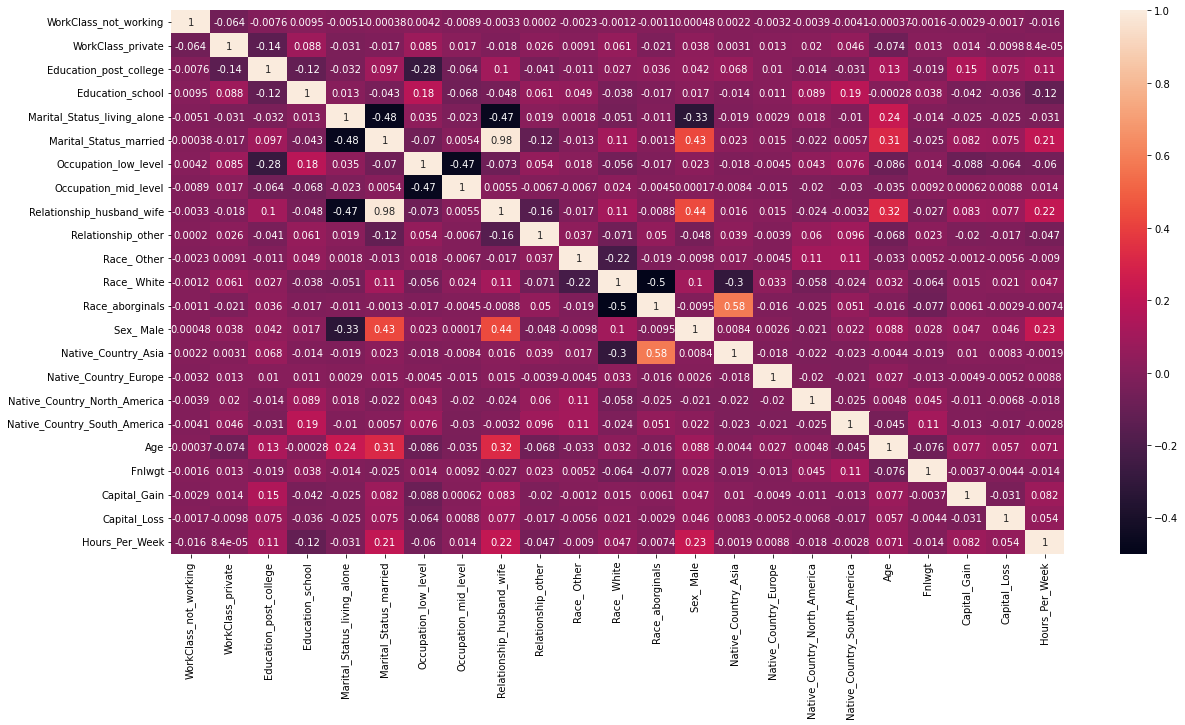

In [68]:
# checking the multicollinearity 
# 
plt.figure(figsize=(20,10))
sns.heatmap(df_model.corr(),annot=True)

In [69]:
df_model.columns

Index(['WorkClass_not_working', 'WorkClass_private', 'Education_post_college',
       'Education_school', 'Marital_Status_living_alone',
       'Marital_Status_married', 'Occupation_low_level',
       'Occupation_mid_level', 'Relationship_husband_wife',
       'Relationship_other', 'Race_ Other', 'Race_ White', 'Race_aborginals',
       'Sex_ Male', 'Native_Country_Asia', 'Native_Country_Europe',
       'Native_Country_North_America', 'Native_Country_South_America', 'Age',
       'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week'],
      dtype='object')

## **Data_Modelling**

In [70]:
X=df_model.copy()

In [71]:
y=df['Income']

In [418]:
X.shape[0]==y.shape[0]

True

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=26,test_size=0.25)

In [424]:
x_train.shape

(36592, 23)

In [425]:
x_test.shape

(12198, 23)

### Logistic_Regression

In [428]:
log_reg= LogisticRegression(random_state=26)

In [429]:
#Fitting the model i.e. is basic
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=26)

In [430]:
predictions=log_reg.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9316
           1       0.70      0.56      0.62      2882

    accuracy                           0.84     12198
   macro avg       0.79      0.74      0.76     12198
weighted avg       0.83      0.84      0.83     12198



In [431]:
#we are getting an weighted avg of .83%
confusion_matrix(y_test,predictions)

array([[8618,  698],
       [1255, 1627]])

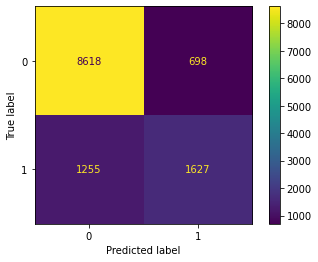

In [432]:
plot_confusion_matrix(log_reg,x_test,y_test)
plt.show()
# we can see from 2882 people earning more than 50k our model could identify around 1627 instances

In [433]:
# we are doing the GridSearchCV to increase our recall score and identify more instance with >50k income
param_grid=[
            {'C':[0.1,0.01,0.001,0.5,1,10,100,1000],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'class_weight' : ['dict','balanced','none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }
]

optimal_params= GridSearchCV( LogisticRegression(), param_grid, cv=5, scoring='f1_macro',verbose=0, n_jobs=-1)

optimal_params.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 0.001, 0.5, 1, 10, 100, 1000],
                          'class_weight': ['dict', 'balanced', 'none'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1_macro')

In [434]:
print(optimal_params.best_params_)

{'C': 100, 'class_weight': 'dict', 'penalty': 'l2', 'solver': 'lbfgs'}


In [435]:
model=LogisticRegression(C=100,class_weight='dict',penalty='l2',solver='lbfgs')
model.fit(x_train,y_train)

LogisticRegression(C=100, class_weight='dict')

In [436]:
#the best parameter identified is still giving us only 83% accuracy sothere is no significant increase after GridSearchCV
y_train_predict= model.predict(x_train)
y_test_predict=model.predict(x_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27793
           1       0.71      0.55      0.62      8799

    accuracy                           0.84     36592
   macro avg       0.79      0.74      0.76     36592
weighted avg       0.83      0.84      0.83     36592

Test Data
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9316
           1       0.70      0.56      0.62      2882

    accuracy                           0.84     12198
   macro avg       0.79      0.74      0.76     12198
weighted avg       0.83      0.84      0.83     12198



In [437]:
confusion_matrix(y_test,y_test_predict)

array([[8615,  701],
       [1257, 1625]])

In [438]:
confusion_matrix(y_test,predictions)

array([[8618,  698],
       [1255, 1627]])

In [439]:
y_train_proba=model.predict_proba(x_train)
y_test_proba=model.predict_proba(x_test)

In [440]:

def proba_class(y_proba,threshold):
  predicted_class= [1 if a[1]>threshold else 0 for a in y_proba]
  return np.array(predicted_class)

In [441]:
checking_true=proba_class(y_test_proba,0.5)==y_test_predict

In [442]:
Counter(checking_true)

Counter({True: 12198})

In [443]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred,beta=1)
  print('precision:{},recall:{},fb:{}'.format(round(precision,2),round(recall,2),round(fb,2)))

In [444]:
classification_metrics(y_train,y_train_predict)
classification_metrics(y_test,y_test_predict)

precision:0.71,recall:0.55,fb:0.62
precision:0.7,recall:0.56,fb:0.62


In [445]:
# we are checking the precision and recall with various thresholds
for threshold in range(10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_train,y_pred_train)

Threshold:0.1
precision:0.46,recall:0.94,fb:0.61
Threshold:0.2
precision:0.51,recall:0.89,fb:0.65
Threshold:0.3
precision:0.59,recall:0.77,fb:0.67
Threshold:0.4
precision:0.65,recall:0.67,fb:0.66
Threshold:0.5
precision:0.71,recall:0.55,fb:0.62
Threshold:0.6
precision:0.78,recall:0.42,fb:0.55
Threshold:0.7
precision:0.85,recall:0.34,fb:0.49
Threshold:0.8
precision:0.91,recall:0.25,fb:0.39
Threshold:0.9
precision:0.97,recall:0.15,fb:0.27


In [446]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred,beta=1)
  print('precision:{},recall:{},fb:{}'.format(round(precision,2),round(recall,2),round(fb,2)))
  return(precision,recall,fb)

In [447]:
#we are going to draw PRC curve to see the best threshold
thresholds_curve=[]
prec=[]
recall=[]
fb=[]
for threshold in range(10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_train,y_pred_train)
  thresholds_curve.append(trsh)
  prec.append(p)
  recall.append(r)
  fb.append(f)

Threshold:0.1
precision:0.46,recall:0.94,fb:0.61
Threshold:0.2
precision:0.51,recall:0.89,fb:0.65
Threshold:0.3
precision:0.59,recall:0.77,fb:0.67
Threshold:0.4
precision:0.65,recall:0.67,fb:0.66
Threshold:0.5
precision:0.71,recall:0.55,fb:0.62
Threshold:0.6
precision:0.78,recall:0.42,fb:0.55
Threshold:0.7
precision:0.85,recall:0.34,fb:0.49
Threshold:0.8
precision:0.91,recall:0.25,fb:0.39
Threshold:0.9
precision:0.97,recall:0.15,fb:0.27


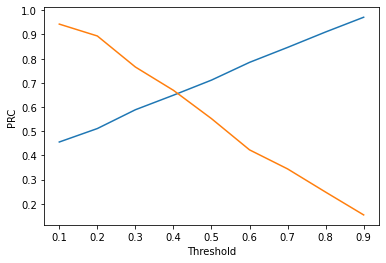

In [448]:
#we could identify we can increase our recall if we keep the threshold value around .43
 sns.lineplot(thresholds_curve,prec)
sns.lineplot(thresholds_curve,recall)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

In [460]:
y_pred_test= proba_class(y_test_proba,0.43)
confusion_matrix(y_test,y_pred_test)

array([[8346,  970],
       [1034, 1848]])

In [450]:
confusion_matrix(y_test,predictions)

array([[8618,  698],
       [1255, 1627]])

In [451]:
confusion_matrix(y_test,y_test_predict)

array([[8615,  701],
       [1257, 1625]])

### Decision Tree

In [461]:
#Basic Dec tree Model
#As usual we can see the overfit in the training data while test data is giving weighted average of 81%
clf=DecisionTreeClassifier(random_state=26)
clf.fit(x_train,y_train)
y_train_predict=clf.predict(x_train)
y_test_predict=clf.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27793
           1       1.00      1.00      1.00      8799

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      9316
           1       0.60      0.63      0.61      2882

    accuracy                           0.81     12198
   macro avg       0.74      0.75      0.75     12198
weighted avg       0.82      0.81      0.81     12198



In [462]:
# we are doing the Grid Seach Cv with various parameters
param_grid={
    'max_depth':np.arange(4,10),
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.01,0.001,1,5,10],
    'criterion': ['gini','entropy']
}

In [463]:
clf=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5,scoring='f1_macro',n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9])},
             scoring='f1_macro')

In [464]:
#best params
print(clf.best_params_)

{'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8}


In [465]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=26,class_weight=None,ccp_alpha=0.001)
clf.fit(x_train,y_train)
y_train_predict=clf.predict(x_train)
y_test_predict=clf.predict(x_test)
print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     27793
           1       0.70      0.65      0.67      8799

    accuracy                           0.85     36592
   macro avg       0.80      0.78      0.79     36592
weighted avg       0.85      0.85      0.85     36592

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      9316
           1       0.70      0.66      0.68      2882

    accuracy                           0.85     12198
   macro avg       0.80      0.79      0.79     12198
weighted avg       0.85      0.85      0.85     12198



In [466]:
confusion_matrix(y_test,y_test_predict)

array([[8497,  819],
       [ 980, 1902]])

### Random_Forest

In [73]:
rndf=RandomForestClassifier(random_state=26)
rndf.fit(x_train,y_train)
y_train_predict=rndf.predict(x_train)
y_test_predict=rndf.predict(x_test)
print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27793
           1       1.00      1.00      1.00      8799

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9316
           1       0.69      0.60      0.64      2882

    accuracy                           0.84     12198
   macro avg       0.79      0.76      0.77     12198
weighted avg       0.84      0.84      0.84     12198



In [74]:
param_grid={
    'n_estimators':[50,75],
    'max_depth':[10,15,25],
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.05,1,5],
    'criterion':['gini','entropy']
}

In [ ]:
grid_model=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring='f1_macro',cv=5,verbose=0,n_jobs=-1)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.05, 1, 5],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 25], 'n_estimators': [50, 75]},
             scoring='f1_macro')

In [76]:
print(grid_model.best_params_)

{'ccp_alpha': 0.05, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50}


In [77]:
rndf= RandomForestClassifier(ccp_alpha=0.05, class_weight='balanced',n_estimators=50,criterion='entropy', max_depth=15,random_state=26)
rndf.fit(x_train,y_train)
y_train_predict=rndf.predict(x_train)
y_test_predict=rndf.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     27793
           1       0.46      0.86      0.60      8799

    accuracy                           0.72     36592
   macro avg       0.70      0.77      0.69     36592
weighted avg       0.82      0.72      0.74     36592

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      9316
           1       0.45      0.86      0.59      2882

    accuracy                           0.72     12198
   macro avg       0.70      0.77      0.69     12198
weighted avg       0.83      0.72      0.74     12198



In [78]:
confusion_matrix(y_test,y_test_predict)

array([[6262, 3054],
       [ 390, 2492]])

### XgBoost

In [98]:
boost=xgboost.XGBClassifier(random_state=26)
boost.fit(x_train,y_train)
y_train_predict=boost.predict(x_train)
y_test_predict=boost.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27793
           1       0.76      0.61      0.68      8799

    accuracy                           0.86     36592
   macro avg       0.82      0.77      0.79     36592
weighted avg       0.85      0.86      0.85     36592

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      9316
           1       0.76      0.61      0.68      2882

    accuracy                           0.86     12198
   macro avg       0.82      0.78      0.80     12198
weighted avg       0.86      0.86      0.86     12198



In [99]:
confusion_matrix(y_test,y_test_predict)

array([[8746,  570],
       [1110, 1772]])

### **Naive_Bayes**

In [96]:
model=GaussianNB()
model.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83     27793
           1       0.51      0.84      0.63      8799

    accuracy                           0.76     36592
   macro avg       0.72      0.79      0.73     36592
weighted avg       0.83      0.76      0.78     36592

              precision    recall  f1-score   support

           0       0.94      0.74      0.82      9316
           1       0.49      0.84      0.62      2882

    accuracy                           0.76     12198
   macro avg       0.71      0.79      0.72     12198
weighted avg       0.83      0.76      0.78     12198



In [97]:
confusion_matrix(y_test,y_test_predict)

array([[6848, 2468],
       [ 474, 2408]])

### **SVM**

In [94]:
model_svm=SVC(random_state=26)
model_svm.fit(x_train,y_train)
y_train_predict=model_svm.predict(x_train)
y_test_predict=model_svm.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     27793
           1       0.74      0.60      0.66      8799

    accuracy                           0.85     36592
   macro avg       0.81      0.77      0.78     36592
weighted avg       0.85      0.85      0.85     36592

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9316
           1       0.73      0.60      0.66      2882

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.78     12198
weighted avg       0.85      0.85      0.85     12198



In [95]:
confusion_matrix(y_test,y_test_predict)

array([[8669,  647],
       [1150, 1732]])

### **KNN**

In [92]:
# instantiate the KNN classifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27793
           1       0.79      0.69      0.74      8799

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      9316
           1       0.65      0.58      0.61      2882

    accuracy                           0.83     12198
   macro avg       0.76      0.74      0.75     12198
weighted avg       0.82      0.83      0.82     12198



In [93]:
confusion_matrix(y_test,y_test_predict)

array([[8422,  894],
       [1211, 1671]])

### Model Selection

**We can see with 86% of weighted average XgBosst is giving the maximum scores. So for modeling we will choose XgBoost**